In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import pydicom
from tqdm.notebook import tqdm

# Exploring the data

### Names of files

In [2]:
train_folder = 'train_images'
test_folder = 'test_images'

In [3]:
train_metadata = 'train.csv'
test_metadata = 'test.csv'

In [4]:
example_submission = 'sample_submission.csv'

In [5]:
train_files = glob(train_folder + '/*')
test_files = glob(test_folder + '/*')
print(f'Number of Train_Files: {len(train_files)}; Number of Test_Files: {len(test_files)}')

Number of Train_Files: 11913; Number of Test_Files: 1


Only 1 Test_File, the rest (~8.000) are kept hidden on kaggle

### Check all training files: Files and/or Folder

In [6]:
train_files[:5]

['train_images/33624',
 'train_images/64153',
 'train_images/65117',
 'train_images/19605',
 'train_images/40910']

In [7]:
def check_folder_file(list_to_check):
    
    num_files = 0  # number of files
    num_folders = 0  # number of folders
    
    for element in list_to_check:
        if os.path.isfile(element):  # if the file is a file
            num_files += 1  # add one
        if os.path.isdir(element):  # same for folder
            num_folders += 1
            
    return num_folders, num_files

In [8]:
num_train_folders, num_train_files = check_folder_file(train_files)

In [9]:
print(f'Train_Folders: {num_train_folders}; Train_Files: {num_train_files}')

Train_Folders: 11913; Train_Files: 0


Only folders in Train_Folder; Now check for the number of files in each of these folders

In [10]:
def get_file_numbers(folders):
    
    num_files = []  # list to add each number for later visualization
    
    for folder in folders:
        num = len(os.listdir(folder))  # number of current folder
        num_files.append(num)  # add it to numbers
    
    min_files = min(num_files)  # minimum number of files
    max_files = max(num_files)  # maximum number of files
    
    file_count = {}  # dict: key is the number of files; value is the count it appears in folders
    
    for num in range(min_files, max_files + 1):  # from min to max + 1 (exclusive)
        
        file_count[num] = num_files.count(num)  # count teh number of times num appears in num_files
    
    print(file_count)
    
    return file_count

In [11]:
file_count_train = get_file_numbers(train_files)

{4: 8233, 5: 1767, 6: 1218, 7: 276, 8: 229, 9: 99, 10: 53, 11: 19, 12: 12, 13: 5, 14: 2}


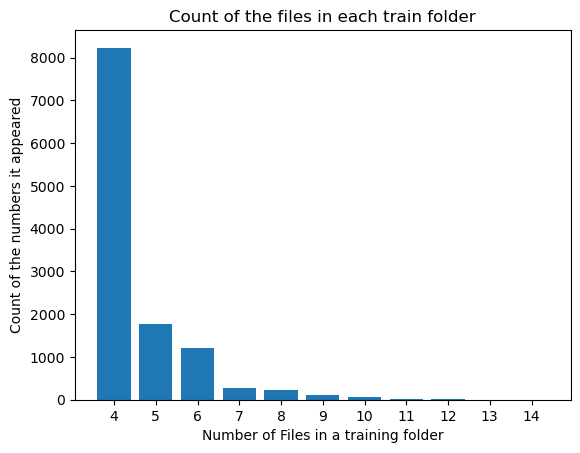

In [12]:
plt.bar(list(file_count_train.keys()), list(file_count_train.values()))
plt.title('Count of the files in each train folder')
plt.xlabel('Number of Files in a training folder')
plt.ylabel('Count of the numbers it appeared')
plt.xticks(range(min(list(list(file_count_train.keys()))), max(list(file_count_train.keys())) + 1))
plt.show()

Important on how to feed the data into the nn later

### Check for the files types and if each folder contains only one format

In [13]:
def check_same_format(folders):
    
    folders_single_datatype = 0
    folders_multiple_datatypes = 0
    
    for folder in folders:
        files = os.listdir(folder)
        endings = [file.split('.')[-1] for file in files]  # list with file ending for each folder
        if len(set(endings)) == 1:  # remove dublicates: if len is one it only has one datatype
            folders_single_datatype += 1
        else:
            folders_multiple_datatypes += 1
    
    print(f'Folder with multiple datatypes: {folders_multiple_datatypes}; With single: {folders_single_datatype}')

In [14]:
check_same_format(train_files)

Folder with multiple datatypes: 0; With single: 11913


#### All files in a folder contain the same datatype; now check for the datatype

In [15]:
def check_datatype(folders):
    
    datatypes = []
    
    for folder in folders:
        file = os.listdir(folder)[0]  # just take the first cause all have the same type anyway
        ending = file.split('.')[-1]  # take the ending and append it
        datatypes.append(ending)
        
    types_unique = list(set(datatypes))
    
    print(types_unique)

In [16]:
check_datatype(train_files)

['dcm']


dcm is the only datatype; evaluate this next

In [17]:
train_files[0]

'train_images/33624'

In [18]:
os.listdir(train_files[0])

['788897862.dcm', '1462078398.dcm', '1362210397.dcm', '1111416410.dcm']

### Evaluate the dcm datatype

In [19]:
train_files[0]

'train_images/33624'

In [20]:
exp_train_files = os.listdir(train_files[0])
exp_folder = train_files[0]
exp_train_paths = [os.path.join(exp_folder, filename) for filename in exp_train_files]
exp_train_paths

['train_images/33624/788897862.dcm',
 'train_images/33624/1462078398.dcm',
 'train_images/33624/1362210397.dcm',
 'train_images/33624/1111416410.dcm']

In [21]:
(exp_1, exp_2, exp_3, exp_4) = (pydicom.dcmread(file) for file in exp_train_paths)

In [22]:
type(exp_1)

pydicom.dataset.FileDataset

In [23]:
exp_1

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.33624.1.788897862
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.33624.1.788897862
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184435.016458'
(0010, 0020) Patient ID                          LO: '33624'
(0018, 11a0) Body Part Thickness                 DS: '60.0'
(001

#### There is a lot of information stored in each dicom file; now plot some images to get a better understanding

Text(0.5, 0.91, 'Four Images of the first four Cases')

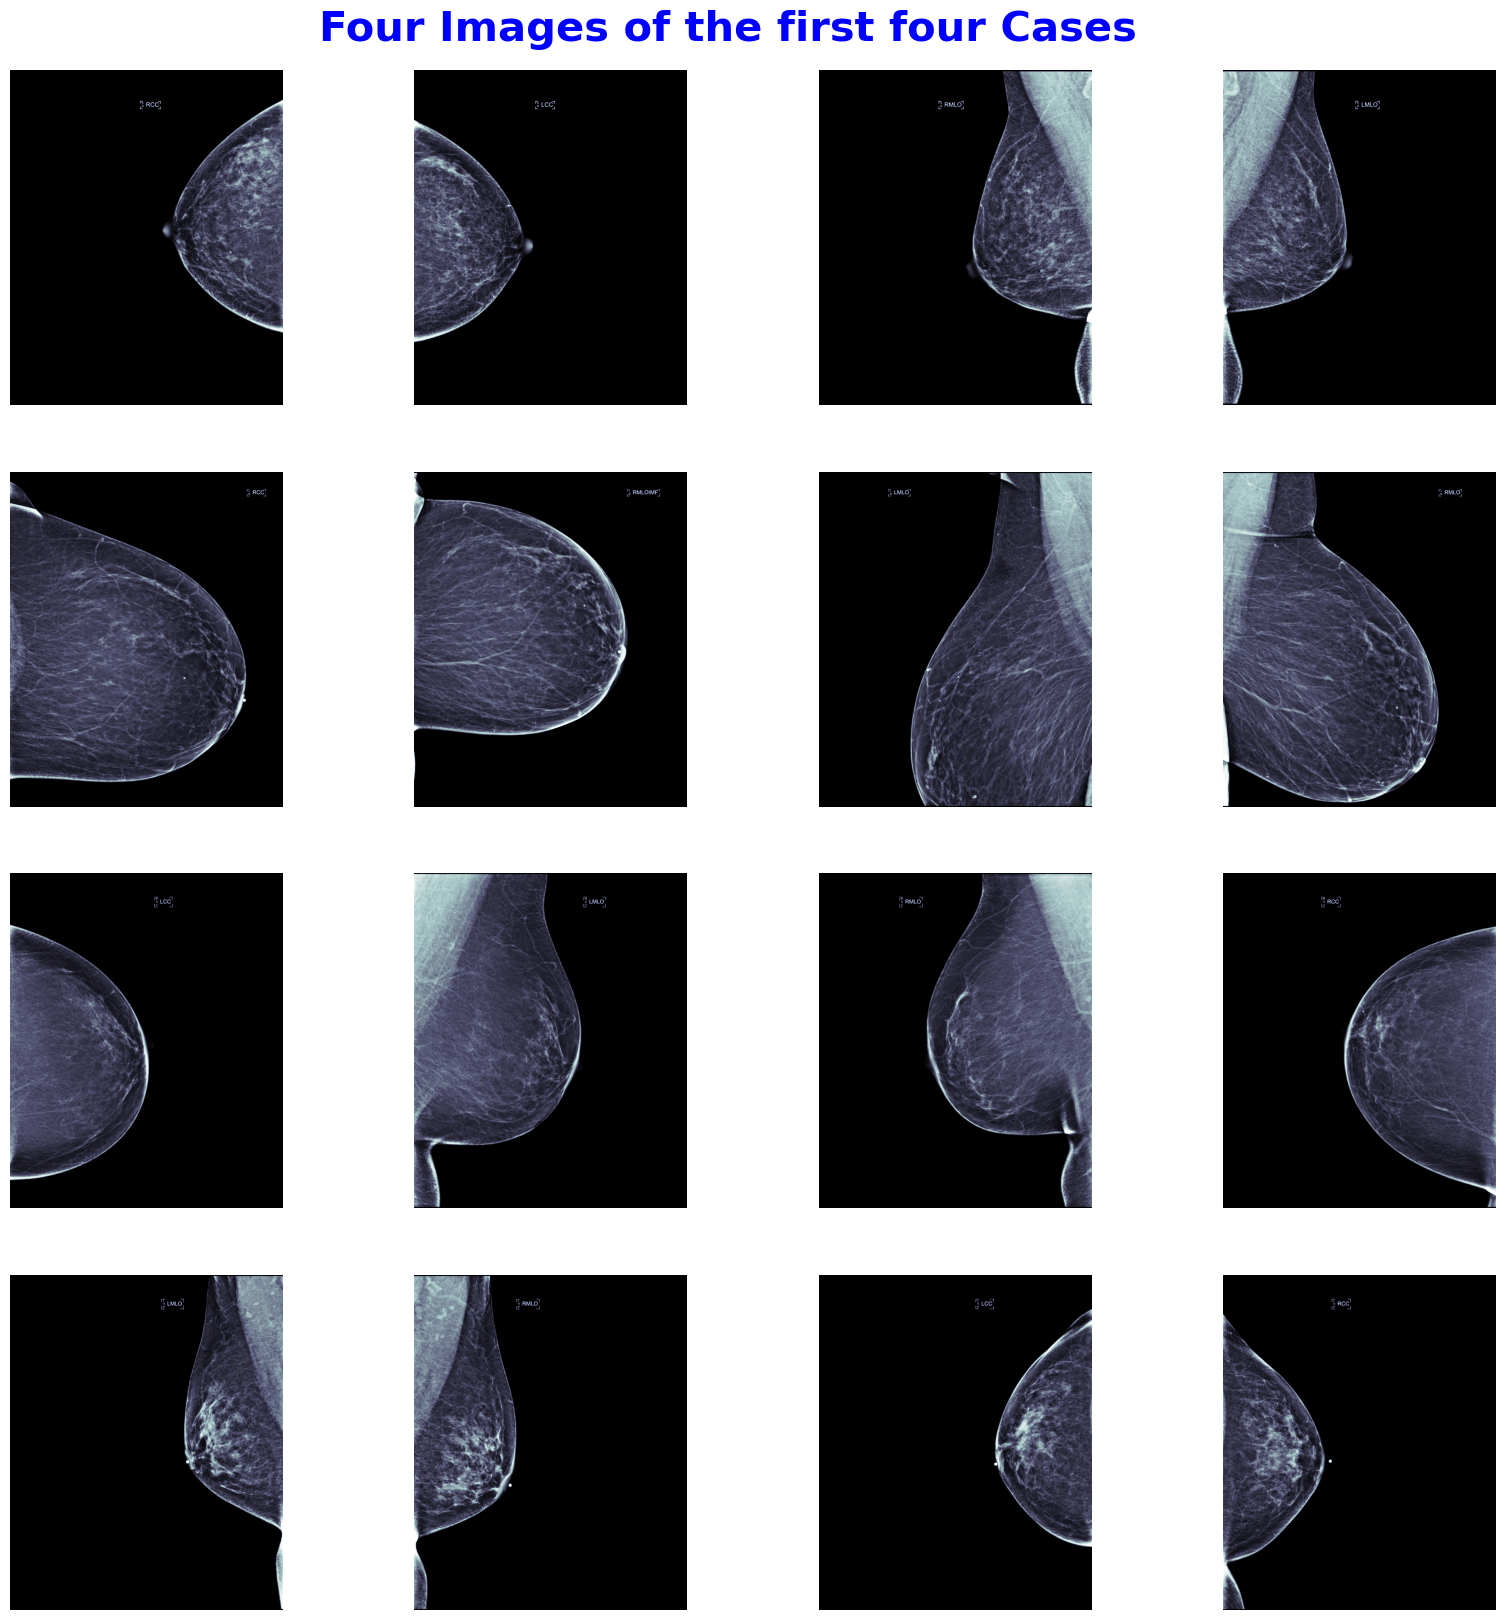

In [24]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for col in range(4):
    folder = train_files[col]
    files = os.listdir(folder)
    for row in range(4):
        file_path = os.path.join(folder, files[row])
        img = pydicom.dcmread(file_path)
        ax[col, row].imshow(img.pixel_array, cmap='bone')
        ax[col, row].axis('off')
fig.suptitle('Four Images of the first four Cases', y=0.91, fontsize=30, fontweight="bold", c='b')

In [25]:
exp_files = [exp_1, exp_2, exp_3, exp_4]  # example files of one patient
exp_files_shape = [exp.pixel_array.shape for exp in exp_files]  # shape of the scans
if len(set(exp_files_shape)) == 1:
    print('Same Size')

Same Size


#### The pictures of each folder (patient/scan) have the same size; now check if they are the same in each of the train folders

In [26]:
def check_for_shapes(folders):
    
    shapes = []
    
    for folder in tqdm(folders):
        file = os.listdir(folder)[0]  # just the first file
        path = os.path.join(folder, file)
        shape = pydicom.dcmread(file_path).pixel_array.shape  # get the shape
        shapes.append(shape)
        
    shapes_unique = list(set(shapes))
    
    shapes_count = {}
    
    for shape in shapes_unique:
        shapes_count[shape] = shapes.count(shape)
        
    if len(shapes_unique) == 1:
        print('All the patient scans have the same shape')
    
    return shapes_count

In [27]:
%%time
train_shapes = check_for_shapes(train_files)

  0%|          | 0/11913 [00:00<?, ?it/s]

All the patient scans have the same shape
CPU times: user 56min 23s, sys: 31.4 s, total: 56min 55s
Wall time: 56min 53s


#### All scans have the same size; now view the only testcase provided

In [29]:
exp_test = test_files[0]
exp_test_files = os.listdir(test_files[0])
exp_test_paths = [os.path.join(test_files[0], file) for file in exp_test_files]
exp_test_paths

['test_images/10008/361203119.dcm',
 'test_images/10008/68070693.dcm',
 'test_images/10008/736471439.dcm',
 'test_images/10008/1591370361.dcm']

In [30]:
(test_0, test_1, test_2, test_3) = (pydicom.dcmread(file) for file in exp_test_paths)

In [31]:
test_0

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10008.1.361203119
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10008.1.361203119
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183902.942187'
(0010, 0020) Patient ID                          LO: '10008'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10008
(0020, 000e) Series Instance U

Text(0.5, 0.64, 'Four Images of the only provided Test-Case')

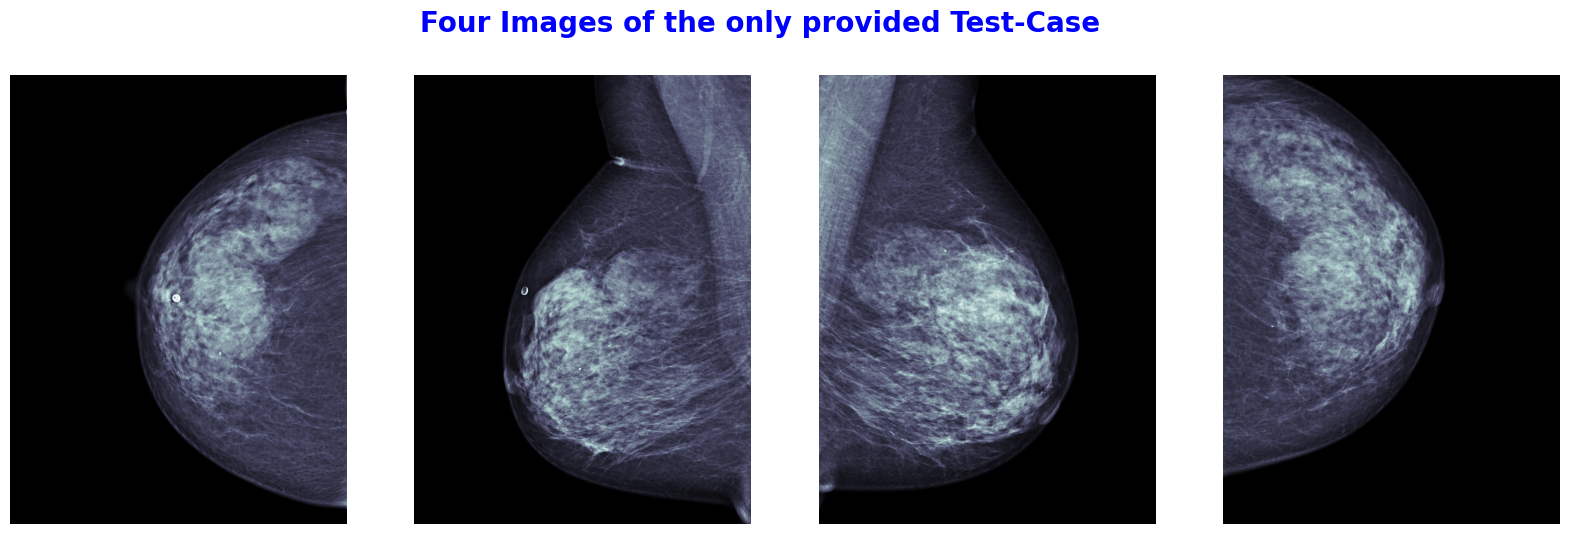

In [32]:
test_images = [test_0, test_1, test_2, test_3]
fig_2, ax_2 = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))
for col in range(4):
    file = test_images[col]
    ax_2[col].imshow(file.pixel_array, cmap='bone')
    ax_2[col].axis('off')
fig_2.suptitle('Four Images of the only provided Test-Case', y=0.64, fontsize=20, fontweight="bold", c='b')

# Now for the additional information stored in the CSV's

In [33]:
train_df = pd.read_csv(train_metadata)
test_df = pd.read_csv(test_metadata)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   site_id        4 non-null      int64 
 1   patient_id     4 non-null      int64 
 2   image_id       4 non-null      int64 
 3   laterality     4 non-null      object
 4   view           4 non-null      object
 5   age            4 non-null      int64 
 6   implant        4 non-null      int64 
 7   machine_id     4 non-null      int64 
 8   prediction_id  4 non-null      object
dtypes: int64(6), object(3)
memory usage: 416.0+ bytes


In [36]:
train_df.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


In [37]:
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [38]:
test_df.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


#### The Test_Metadata has less information stored which needs to be considered on what train features to use

#### The target to predict is the Cancer Value

In [39]:
train_df.patient_id.value_counts()

52868    14
55706    14
9795     13
51115    13
5421     13
         ..
32743     4
32751     4
32763     4
32770     4
9989      4
Name: patient_id, Length: 11913, dtype: int64

This is equal to the count of files in each train folder

## Visualization

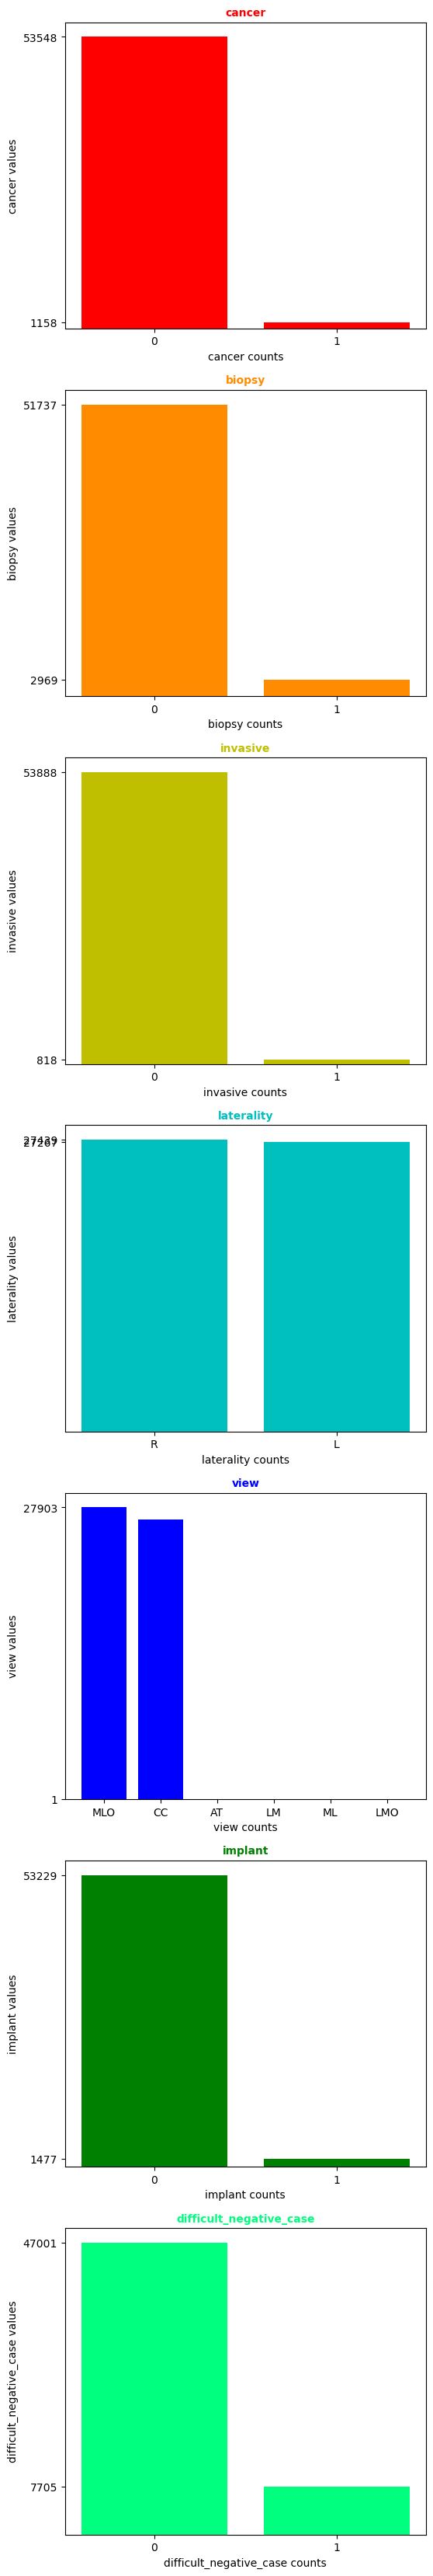

In [40]:
# columns for bar charts
cols_for_bar = ['cancer', 'biopsy', 'invasive', 'laterality', 'view', 'implant', 'difficult_negative_case']
y_labels = [word + ' values' for word in cols_for_bar]  # y labels for the barcharts
x_labels = [word + ' counts' for word in cols_for_bar]  # x labels for the barcharts
colors = ['r', 'darkorange', 'y', 'c', 'b', 'g', 'springgreen']

fig_3, ax_3 = plt.subplots(nrows=7, figsize=(6, 42))
for row in range(len(cols_for_bar)):
    current_series = train_df[cols_for_bar[row]].value_counts()  # value counts of each column defined above
    indices = list(current_series.index)
    counts = list(current_series.values)
    ax_3[row].bar(indices, counts, color=colors[row])
    ax_3[row].set_xlabel(x_labels[row])
    ax_3[row].set_ylabel(y_labels[row])
    ax_3[row].set_xticks(indices)
    ax_3[row].set_yticks([max(counts), min(counts)])
    ax_3[row].set_title(cols_for_bar[row], fontsize=10, fontweight="bold", c=colors[row])

#### From the total 54706 training scans there are only 1158 with cancer. <br>
#### From those 1158 cases 818 were invasive which is the majority.<br>
#### 2969 biopsies were taken. This is more then twice as much as the number of positive cancer cases.<br>
#### 7705 negative cases were hard to predict.<br>
#### These facts illustrate the problem with a high amount of false positive cases.<br>
#### The laterality was nearly the same (if the scan contains the right or left breast).<br>
#### 1477 scans contained implants.<br>
#### There are mainly two views in the scans. These can be seen in the shown images above as well. <br>
#### One allways in from top, the other one is more diagonal. The other values rarely take place.<br>

In [41]:
train_df.view.value_counts()

MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64

In [42]:
#birabs

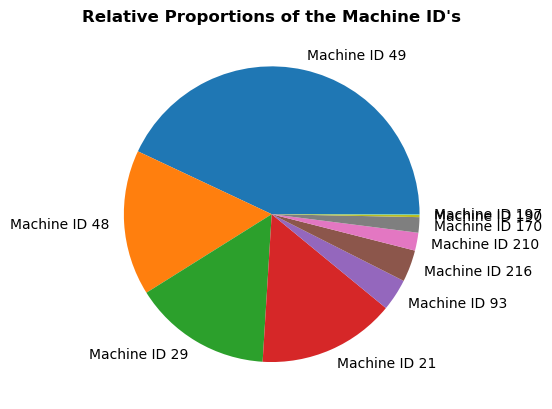

In [43]:
counts = train_df.machine_id.value_counts().values
index = train_df.machine_id.value_counts().index
plt.pie(counts, labels=['Machine ID ' + str(i) for i in index])
plt.title("Relative Proportions of the Machine ID's", fontweight="bold")
plt.show()

####  Most scans are from Machine with ID 49

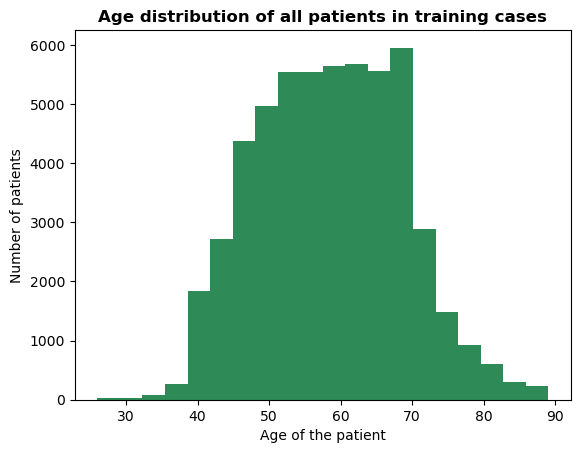

In [44]:
train_df.age.hist(bins=20,  color='seagreen')
plt.xlabel('Age of the patient')
plt.ylabel('Number of patients')
plt.title('Age distribution of all patients in training cases', fontweight="bold")
plt.grid(visible=False)

#### As seen in cell 35 above the mean age is nearly 60, the minimum age is 26, the maximum is 89.

#### 42 vaues are missing

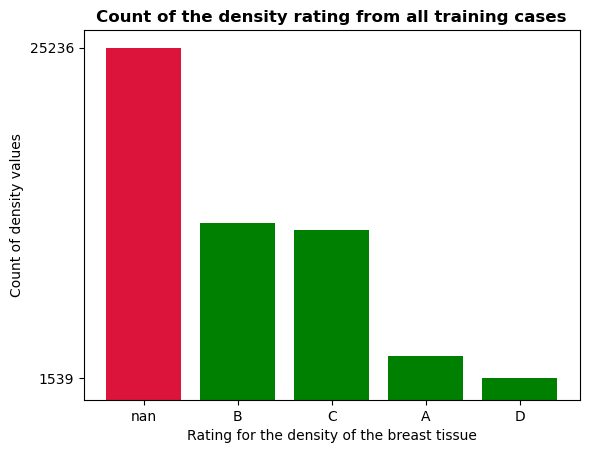

In [45]:
indices = [str(index) for index in train_df.density.value_counts(dropna=False).index]
values = train_df.density.value_counts(dropna=False).values
plt.bar(indices, values, color=['crimson', 'g', 'g', 'g', 'g'])
plt.xticks(indices)
plt.yticks([max(values), min(values)])
plt.xlabel('Rating for the density of the breast tissue')
plt.ylabel('Count of density values')
plt.title('Count of the density rating from all training cases', fontweight="bold")
plt.show()

#### Nearly half of the values are missing; D is the densest rating (the more dense the harder the prediction)

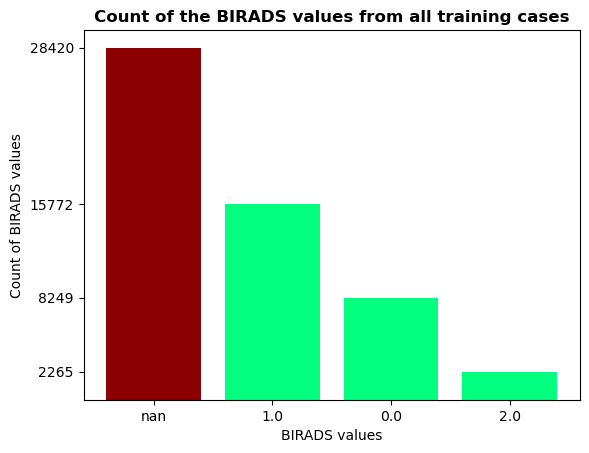

In [46]:
indices = [str(index) for index in train_df.BIRADS.value_counts(dropna=False).index]
values = train_df.BIRADS.value_counts(dropna=False).values
plt.bar(indices, values, color=['darkred', 'springgreen', 'springgreen', 'springgreen'])
plt.xticks(indices)
plt.yticks(values)
plt.xlabel('BIRADS values')
plt.ylabel('Count of BIRADS values')
plt.title('Count of the BIRADS values from all training cases', fontweight="bold")
plt.show()

#### Nearly the haft of the values are missing here as well; Values have the following meaning:

0: breast required follow-up check <br>
1: breast was rated negativ for cancer <br>
2: breast is rated normal